In [1]:
# import libraries
from pyowm.owm import OWM
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pdfkit
import datetime
from my_api_key import api_key # replace with your own

In [2]:
# Set API key
owm = OWM(api_key=api_key)

In [3]:
# Define the default parameters
# this will be changed with papermill
CITY = ''

In [4]:
# Parameters
CITY = "New York"


In [5]:
# include your own locations
coords_dict = {
    'Johannesburg': {'lat':-26.193203, 'lon':28.030471},
    'Berlin': {'lat':52.520283, 'lon':13.404808}, 
    'New York': {'lat':40.709765, 'lon':-74.007790}, 
    'Sao Paulo': {'lat':-23.607585, 'lon':-46.631223}, 
}

# 1. Fetch weather data with PyOWM API

In [6]:
# Instantiate forecast object and fetch weather information about city
mgr = owm.weather_manager()
one_call = mgr.one_call(lat=coords_dict[CITY]['lat'], lon=coords_dict[CITY]['lon'])

In [7]:

# Create a dictionary to organize the forecast data for the city of interest
dict_forecast = {
    'datetime':[],
    'clouds':[],
    'humidity':[],
    'temp':[],
    'temp_max':[],
    'temp_min':[],
    'detailed_status':[],
    'icon_url':[],
    #'rain_vol':[]
}

In [8]:
#Itereate over forecast object acessing the weather features
for day in range(5):
    dict_forecast['datetime'].append(datetime.datetime.fromtimestamp(one_call.forecast_daily[day].ref_time).strftime('%Y-%m-%d'))
    dict_forecast['clouds'].append(one_call.forecast_daily[day].clouds)
    dict_forecast['humidity'].append(one_call.forecast_daily[day].humidity)
    dict_forecast['temp'].append(one_call.forecast_daily[day].temperature('celsius')['day'])
    dict_forecast['temp_max'].append(one_call.forecast_daily[day].temperature('celsius')['max'])
    dict_forecast['temp_min'].append(one_call.forecast_daily[day].temperature('celsius')['min'])
    
    dict_forecast['detailed_status'].append(one_call.forecast_daily[day].detailed_status)
    dict_forecast['icon_url'].append(one_call.forecast_daily[day].weather_icon_url())
    #if '3h' in weather.get_rain().keys():
    #    dict_forecast['rain_vol'].append(weather.get_rain().get('3h'))
    #else:
    #    dict_forecast['rain_vol'].append(0)

In [9]:
# Create Dataframe from dictionary
df = pd.DataFrame.from_dict(dict_forecast)
df = df.set_index('datetime')
df

,clouds,humidity,temp,temp_max,temp_min,detailed_status,icon_url
datetime,,,,,,,
2021-10-01,0,34,18.52,20.98,10.26,clear sky,http://openweathermap.org/img/wn/01d.png
2021-10-02,15,43,21.96,24.96,14.81,few clouds,http://openweathermap.org/img/wn/02d.png
2021-10-03,46,38,24.11,26.30,17.47,scattered clouds,http://openweathermap.org/img/wn/03d.png
2021-10-04,99,62,23.10,25.62,20.46,moderate rain,http://openweathermap.org/img/wn/10d.png
2021-10-05,100,73,22.93,26.47,19.16,light rain,http://openweathermap.org/img/wn/10d.png


# 2. Create visualisations

### Temparature plot

In [10]:
df_temp = df[['temp_min', 'temp_max', 'temp']]
df_temp

,temp_min,temp_max,temp
datetime,,,
2021-10-01,10.26,20.98,18.52
2021-10-02,14.81,24.96,21.96
2021-10-03,17.47,26.30,24.11
2021-10-04,20.46,25.62,23.10
2021-10-05,19.16,26.47,22.93


C:\Users\Ruan Pretorius\anaconda3\envs\papermill-weather\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


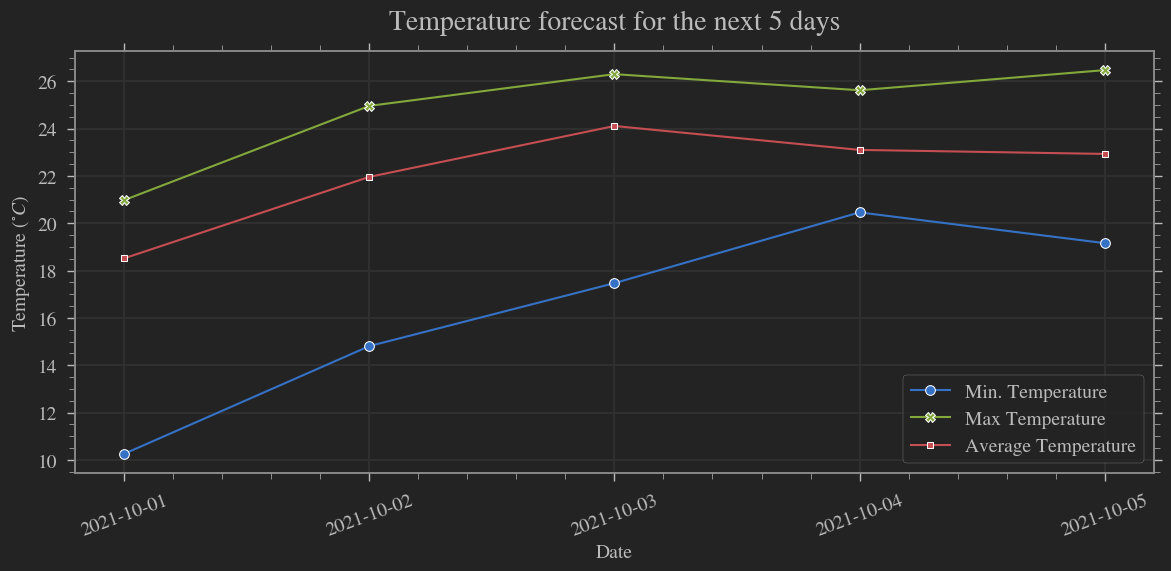

In [11]:
# Plotting the temperature for the next 5 days
fig = plt.figure()
sns_plot = sns.lineplot(data=df_temp, markers=True, dashes=False)
sns_plot.set_title(f'Temperature forecast for the next 5 days', fontsize=20)
sns_plot.set_xlabel('Date', fontsize=14)
sns_plot.set_ylabel('Temperature ($^{\circ} C$)', fontsize=14)
sns_plot.set_xticklabels(df_temp.index, rotation=20)
sns_plot.grid(True)

sns_plot.legend(labels=['Min. Temperature', 'Max Temperature', 'Average Temperature'])
fig.set_size_inches(12, 6)

temperature_plot = f"{CITY.split(',')[0].replace(' ','_')}_temperature.png"
sns_plot.figure.savefig(f'figures/{temperature_plot}', 
                  dpi=300, #facecolor='w', 
                  orientation='portrait',
                  bbox_inches='tight')